1) In plain English, explain the difference between PCA and t-SNE
2) How many Principal components are required to retain at least 70% of the variance (info) in the data?
3) Take the first 3 principal component in your analysis. What actual variables in the data are the most associated with the 3 principal components?
4) Can you identify any meaningful pattern in the t-SNE analysis?

1) In plain English, explain the difference between PCA and t-SNE

Principal component analysis (PCA) is an unsupervised linear dimensionality reduction and data visualization method for very high dimensional data. Having high-dimensional data makes it hard to get insights from it, and it takes a lot of processing power to do so. The main idea behind this method is to reduce the number of dimensions of data that is highly related by changing the original set of vectors into a new set, which is called the Principal component.

PCA tries to keep the global structure of the data, which means that when converting x-dimensional data to x'-dimensional data, it tries to map all the clusters as a whole, which means that some local structures might be lost. This technique can be used for stock market predictions etc.

t-distributed stochastic neighbourhood embedding (t-SNE): t-SNE is also an unsupervised non-linear dimensionality reduction and data visualization technique. It moves points from a higher dimension to a lower dimension while trying to keep the area around each point the same.

In contrast to PCA, it tries to keep the local structure of the data by minimizing the Kullback–Leibler (KL) divergence between the two distributions in terms of where the points are on the map. This method is used to study computer security, analyze music, study cancer, do bioinformatics, and process biomedical signals.

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

from sklearn.cluster import KMeans

from sklearn_extra.cluster import KMedoids

In [30]:
data = pd.read_csv(r'C:\Users\USER\Downloads\marketing_campaign.csv') 

print (data)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
0            0  04-09-2012       58       635  ...          

In [31]:
categorical_columns = ['Education', 'Marital_Status']

# Number of unique observations in each category
for column in categorical_columns:
    print("-" * 38)
    print("Unique values in", column, "are :")
    print(" ")
    print(data[column].value_counts(normalize = True))
    print("-" * 38)
    print(" \n")

--------------------------------------
Unique values in Education are :
 
Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64
--------------------------------------
 

--------------------------------------
Unique values in Marital_Status are :
 
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
YOLO        0.000893
Absurd      0.000893
Name: Marital_Status, dtype: float64
--------------------------------------
 



In [4]:
# Dropping ID column: 
data.drop(columns = "ID", inplace = True)

# Dropping Complain column: 
data.drop(columns = "Complain", inplace = True)

In [5]:
data['Age'] = 2016 - pd.to_datetime(data['Year_Birth'], format="%Y").apply(lambda x: x.year)

# Dropping Year_Birth column: Create a new column "Age" and calculate the Age then drop the "Year_Birth" column"
data.drop(columns = "Year_Birth", inplace = True)

In [6]:
#  Total customer spending across all products
ttl_spending = [col for col in data.columns if 'Mnt' in col]
data['Total_Spending'] = data[ttl_spending].sum(axis = 1)

#  Total customer spending across all products
ttl_purchases = [col for col in data.columns if 'Purchases' in col]
data['Total_Purchases'] = data[ttl_purchases].sum(axis = 1)

# Total number of offers accepted by a customer
campaigns_cols = [col for col in data.columns if 'Cmp' in col]
data['Total_Campaigns_Accepted'] = data[campaigns_cols].sum(axis = 1)

In [7]:
# Customers that have children at home
data['Children'] = data['Teenhome'] + data['Kidhome']

# Dropping Teenhome and Kidhome columns
data.drop(columns = "Kidhome", inplace = True)
data.drop(columns = "Teenhome", inplace = True)

#Create Relationship variable
data['Marital_Status'].replace(['Married', 'Together'], 'Relationship', inplace = True)

#Create Relationship variable
data['Marital_Status'].replace(['Married', 'Together'], 'Relationship', inplace = True) 

In [8]:
# Dropping rows with variables outside the 99.5 percentile
data = data[data.Age < 73]
data = data[data.Income < 103000]
data = data[data.Total_Purchases < 34]
data = data[data.Total_Spending < 2275]
data = data[data.MntWines < 1374]
data = data[data.MntSweetProducts < 192]
data = data[data.MntGoldProds < 242]
data = data[data.NumDealsPurchases < 13]
data = data[data.NumWebPurchases < 12]
data = data[data.NumCatalogPurchases < 12]
data = data[data.NumWebVisitsMonth < 10]

In [9]:
# Check the shape of the data
data.shape

(2131, 27)

In [10]:
# Dropping all the categorical variables,since distance vectors cannot be calculated between for categorical variables
data.drop(
    columns = [
        'Education',
        'Marital_Status',
        'Dt_Customer',
        'Response',
        'Age',
        'AcceptedCmp1',
        'AcceptedCmp2',
        'AcceptedCmp3',
        'AcceptedCmp4',
        'AcceptedCmp5',
        'Recency',
        'Children',
        'Total_Campaigns_Accepted'
    ], axis = 1, inplace = True)

In [11]:
# Check the shape of new data 
data.shape

(2131, 14)

In [12]:
# Initialize the Standard Scaler
scaler = StandardScaler()

# fit_transform the scaler function on new data
data_scaled = scaler.fit_transform(data)

# Converting the embeddings to a dataframe
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled.head()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Spending,Total_Purchases
0,0.342563,1.069227,1.589879,1.850730,2.535813,1.610698,0.938435,0.399045,1.522789,2.792516,-0.561329,0.738342,1.795638,1.379818
1,-0.241356,-0.875849,-0.631698,-0.729144,-0.643695,-0.637259,-0.742177,-0.172437,-1.165429,-0.578859,-1.185158,-0.142872,-0.959232,-1.160882
2,1.009708,0.417751,0.594000,-0.151061,1.394930,-0.120487,-0.004347,-0.743918,1.522789,-0.204262,1.310158,-0.583478,0.338502,0.844934
3,-1.216601,-0.875849,-0.555091,-0.662258,-0.494071,-0.585581,-0.762672,-0.172437,-0.781398,-0.953456,-0.561329,0.297735,-0.914184,-0.893440
4,0.350237,-0.370877,0.440787,-0.194059,0.179236,0.034544,-0.557719,1.542007,0.370695,0.170335,0.062500,-0.142872,-0.274846,0.577492


In [13]:
# Storing the number of variables in the data
n = data.shape[1]                                        

# Initialize PCA with n_components = n and random_state=1
pca = PCA(n_components = n, random_state = 1)

# fit_transform PCA on the scaled data
data_pca = pd.DataFrame(pca.fit_transform(data_scaled))

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_
exp_var

array([5.48701309e-01, 1.36789551e-01, 6.36862094e-02, 4.55997788e-02,
       4.22686665e-02, 3.32916437e-02, 2.98834161e-02, 2.80992693e-02,
       2.27846927e-02, 2.00224224e-02, 1.85745060e-02, 1.02985352e-02,
       7.16957733e-33, 1.17803013e-33])

<AxesSubplot:xlabel='0', ylabel='1'>

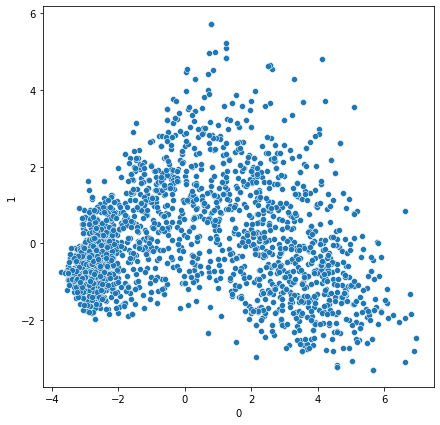

In [15]:
plt.figure(figsize = (7,7))                                      
sns.scatterplot(x = 0, y = 1, data = data_pca)

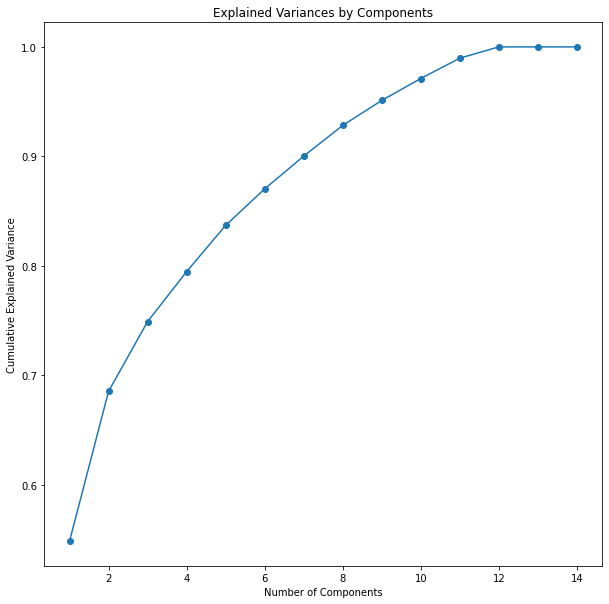

In [18]:
# plotting the explained variance by individual components
plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), exp_var.cumsum(), marker = 'o', linestyle = '-')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

2) How many Principal components are required to retain at least 70% of the variance (info) in the data?

In [17]:
# Finding the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.70):
        print("Number of PCs that explain at least 70% variance: ", ix + 1)
        break

Number of PCs that explain at least 70% variance:  3


3) Take the first 3 principal component in your analysis. What actual variables in the data are the most associated with the 3 principal components?

In [23]:
pc_comps = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

data_pca.T
pc1 = pd.DataFrame(np.round(pca.components_.T[:, 0:5], 2), index = data_scaled.columns, columns = pc_comps)

In [27]:
# use the mean for the coefficient limit
coeff_limit = np.median([0.32, 0.29, 0.25, 0.29, 0.26, 0.25, 0.22, -0.02, 0.23, 0.31, 0.28, -0.22, 0.34, 0.31])
print('The coefficient limit is',coeff_limit)

def color_high(val):
    if val <= -coeff_limit:
        return 'background: yellow'
    
    elif val >= coeff_limit:
        return 'background: lightblue'   
    
pc1.style.applymap(color_high)

The coefficient limit is 0.27


,PC1,PC2,PC3,PC4,PC5
Income,0.320000,-0.050000,-0.250000,-0.000000,-0.100000
MntWines,0.290000,0.160000,-0.370000,0.080000,0.330000
MntFruits,0.250000,-0.170000,0.410000,-0.290000,0.070000
MntMeatProducts,0.300000,-0.180000,-0.080000,-0.000000,0.210000
MntFishProducts,0.260000,-0.190000,0.400000,-0.080000,0.030000
MntSweetProducts,0.250000,-0.170000,0.360000,-0.370000,0.010000
MntGoldProds,0.210000,0.100000,0.430000,0.810000,-0.110000
NumDealsPurchases,-0.010000,0.600000,0.210000,-0.150000,-0.390000
NumWebPurchases,0.230000,0.430000,0.050000,-0.110000,0.270000
NumCatalogPurchases,0.310000,-0.040000,-0.100000,0.170000,-0.010000


T-sne

4) Can you identify any meaningful pattern in the t-SNE analysis?

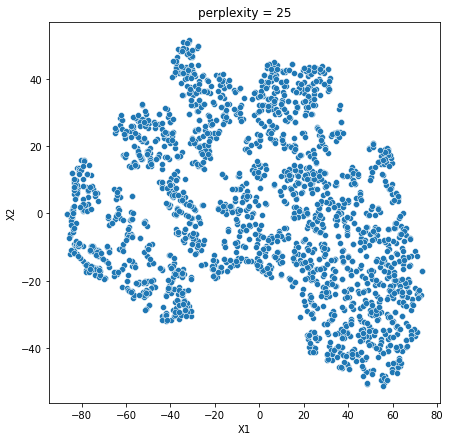

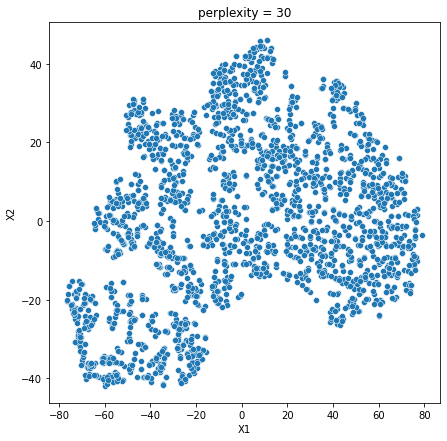

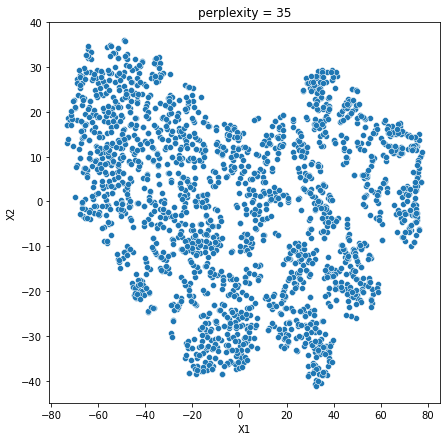

In [28]:
#Visualize the data using different perplexities

for i in range(25, 40, 5):
        
    # Initializing T-SNE with number of component equal to 2, random_state=1, and perplexity=35
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
    
    # fit_transform T-SNE on new data
    data_tsne = tsne.fit_transform(data_scaled)
    
    # Converting the embeddings to a dataframe
    data_tsne = pd.DataFrame(data_tsne)
    
    # Scatter plot for two components
    data_tsne.columns = ['X1', 'X2']
    plt.figure(figsize = (7,7))
    sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)
    plt.title("perplexity = {}".format(i))

Some clusters for,.
A observable cluster emerges in the upper left of the screen when the perplexity is set to 25.